In [2]:
!nvidia_smi
# Colab Free 사용제한으로 gpu 사용 불가

/bin/bash: line 1: nvidia_smi: command not found


# 필요한 라이브러리 및 데이터 준비

## 라이브러리 설치

In [3]:
# 필요한 라이브러리 설치하기

!pip install numpy==1.24.4
!pip install PyTDC
!pip install lifelines
!pip install rdkit-pypi

  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.


## 데이터 준비하기

[Therapeutics Data Commons](https://tdcommons.ai/)

## Toxicity Prediction Task Overview

**Definition** : 사람의 유기체에서 약품이 얼마나 독성을 가질지를 알아보아야 한다. 따라서, 학습 목표는 정확하게 다양한 종류의 의약물의 독성을 측정할 수 있는지이다.

**Impact** : 독성은 화합물 분해가 주요 원인 중 하나이다. 연구에 따르면 대략 70%의 독성 관련 생분해가 전임상 단계에서 발생하고 모두 인간에게 독성을 끼친다고 강하게 예측하는 것으로 나타났다. 이는 독성에 대한 초기의 정확한 예측이 화합물 독성을 크게 줄이고 시판 가능성을 높일 수 있음을 시사한다.

**Generalization** : ADME 예측과 유사하게, 관심있는 약의 화학구조가 시간이 지날수록 변화하기 때문에 독성 예측은 모델이 기존 약물 셋과 구조적 유사성이 적은 새로운 약물 셋으로 점차 일반화하는 동작이 필요하다.

**Product** : 저분자 화합물

**Pipeline** : 효율적이고 안전하게

### Acute Toxicity LD50

**Dataset Description** : Acute Toxicity LD50은 치명적인 부작용을 초래할 수 있는 약물의 가장 안전한 용량을 측정한다. 복용량이 높을수록 약물의 치사율이 높아진다.

**Task Descriptoin** : 회귀 방식을 활용한다. 약물의 SMILES 문자열을 통해 급성 독성을 예측할 것이다.


**Dataset Statistics** : 7,385 drugs

~추가로 포트폴리오를 만들 때, 다른 데이터에도 적용해볼 것.~



In [4]:
from tdc.single_pred import Tox

# TDC api를 이용하여 LD50 데이터 불러오기
data = Tox(name = 'LD50_Zhu')
# 불러온 데이터 train-valid-test로 나누기
split = data.get_split()

Found local copy...
Loading...
Done!


In [5]:
# 나누어진 데이터 확인
split.keys()

dict_keys(['train', 'valid', 'test'])

In [6]:
# Train data
split['train']

,Drug_ID,Drug,Y
0,"Methane, tribromo-",BrC(Br)Br,2.343
1,Bromoethene (9CI),C=CBr,2.330
2,"1,1'-Biphenyl, hexabromo-",Brc1ccc(-c2ccc(Br)c(Br)c2Br)c(Br)c1Br,1.465
3,"Isothiocyanic acid, p-bromophenyl ester",S=C=Nc1ccc(Br)cc1,2.729
4,"Benzene, bromo-",Brc1ccccc1,1.765
...,...,...,...
5165,"Benzenesulfonic acid, 3,5-dimethyl-4-hydroxy-",Cc1cc(S(=O)(=O)O)cc(C)c1O,1.883
5166,"Isocyanic acid, (alpha,alpha,alpha-trifluoro-o...",O=C=Nc1ccccc1C(F)(F)F,1.427
5167,"Propanenitrile, 3-((2-(acetyloxy)ethyl)phenyla...",CC(=O)OCCN(CCC#N)c1ccccc1,2.050
5168,"IH-Indene-1,3(2H)-dione, 2-(2-methyl-1-(2-(1-p...",CC1=CC(=C2C(=O)c3ccccc3C2=O)C=CN1CCN1CCCCC1,2.951


In [7]:
# Valid data
split['valid']

,Drug_ID,Drug,Y
0,"Heptanoic acid, 7-iodo-",O=C(O)CCCCCCI,2.058
1,"2(1H)-Quinazolinone, 4-(3-hydroxyphenyl)-7-met...",Cc1ccc2c(-c3cccc(O)c3)nc(=O)n(C(C)C)c2c1,2.266
2,"Heptanoic acid, 2-(4-(3-(2-(trifluoromethyl)-1...",CCCCCCC(=O)OCCN1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F...,3.378
3,"1-Butanol, 2-ethyl-",CCC(CC)CO,1.742
4,"2,8,9-Trioxa-5-aza-1-silabicyclo(3.3.3)undecan...",Clc1cccc([Si]23OCCN(CCO2)CCO3)c1,4.255
...,...,...,...
733,"(1)-alpha,alpha,4-Trimethylcyclohex-3-ene-1-me...",CC1=CCC(C(C)(C)O)CC1,1.475
734,5-(Aminomethyl)isoxazol-3-ol hydrate,NCc1cc(=O)[nH]o1,3.404
735,"Acetaldehyde, diethyl acetal",CCOC(C)OCC,1.410
736,"3H-1,4-Benzodiazepin-2-amine, 7-chloro-N-(cycl...",[O-][N+]1=C(c2ccccc2)c2cc(Cl)ccc2N=C(NCC2CC2)C1,1.888


In [8]:
# Test data
split['test']

,Drug_ID,Drug,Y
0,"Ether, alpha-(bromomethyl)-p-cyclopentylbenzyl...",CCCCOC(CBr)c1ccc(C2CCCC2)cc1,3.114
1,"Benzene, 1,4-dinitroso-",O=Nc1ccc(N=O)cc1,2.125
2,"Succinic acid, mercapto-, diethyl ester, S-est...",CCOC(=O)CC(SP(=O)(OC)SC)C(=O)OCC,3.466
3,"Phosphorodithioic acid, O,S,S-triethyl ester",CCOP(=O)(SCC)SCC,3.185
4,"Phenol, 2-octyl- (9CI)",CCCCCCCCc1ccccc1O,1.867
...,...,...,...
1472,"1H-1,2,4-Triazole, 1-((2-(2,4-dichlorophenyl)-...",CCCC1COC(Cn2cncn2)(c2ccc(Cl)cc2Cl)O1,2.353
1473,"Phosphorothioic acid, O-(3-chloro-4-nitropheny...",CCOP(=S)(OCC)Oc1ccc([N+](=O)[O-])c(Cl)c1,3.814
1474,"Dibenz(b,f)oxepin-2-acetic acid, 10,11-dihydro...",Cc1ccc2c(c1)CC(=O)c1cc(CC(=O)O)ccc1O2,2.937
1475,"Phosphorothioic acid, O,O-dimethyl S-(2-(ethyl...",CCS(=O)(=O)CCSP(=O)(OC)OC,3.908


# Data pre-processing

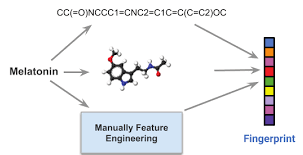

화합물의 이름이나 화학 공식을 그대로 활용하기는 어렵다. 따라서 화합물 데이터에 대해서 RDkit의 룰베이스 방식을 활용하여 벡터화해줄 것이다.


**자세한 내용은 아래 링크 참조하세요**

[RDkit](https://www.rdkit.org/docs/GettingStartedInPython.html)

[Molecular representations in AI-driven drug discovery: a review and practical guide](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-020-00460-5)


[Extended-Connectivity Fingerprints](https://pubs.acs.org/doi/full/10.1021/ci100050tcasa_token=vsI6rp6l2RYAAAAA%3A_HTqMGypPZSQJnF4VqM4xl7KApBKMtKD1STnbh_EHOWeFOsfPKGETjY-SaiC-9XQtyhIEZHvGRRcMcEM)


In [9]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np

def smiles2morgan(s, radius = 2, nBits = 1024):
    """SMILES data를 morgan fingerprint 데이터로 변환
       SMILES data가 뭐냐면? Simplified Molecular Input Line Entry System
       ex. CCCC1COC(Cn2cncn2)(c2ccc(Cl)cc2Cl)O1

    Args:
        s (str): SMILES of a drug
        radius (int): ECFP radius
        bBits (int): size of binary representation

    Return ():
        morgan fingerprint

    """
    try:
        mol = Chem.MolFromSmiles(s)
        features_vec = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)
        features = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(features_vec, features)
    except:
        print('rdkit not found this smiles for morgan: ' + s + ' convert to all 0 features')
        features = np.zeros((nBits, ))

    return features

In [10]:
# 전처리 함수 적용하기

for mode in ['train', 'valid', 'test']:
  split[mode]['embedding'] = split[mode]['Drug'].apply(smiles2morgan)

In [11]:
# morgan fingerprint로 변환된 데이터 확인

split["test"]['embedding']

0       [0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
1472    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1473    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1474    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1475    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1476    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: embedding, Length: 1477, dtype: object

# Torch Dataset & DataLoader 생성


In [12]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils import data

In [13]:
class data_process_loader(data.Dataset):
    """전처리한 데이터를 학습에 사용하기 위한 추상 클래스
    torch.utils.data.Dataset을 상속
    """
    def __init__(self, df):
        # 생성자
        # 앞서 전처리한 데이터 attribute에 저장
        self.df = df

    def __len__(self):
        # 전체 샘플 개수 출력을 위한 method
        return self.df.shape[0]

    def __getitem__(self, index):
        # 인덱스로 데이터에 접근하기 위한 method
        v_d = self.df.iloc[index]['embedding']  # input
        y = self.df.iloc[index]['Y'] # label

        return v_d, y

In [14]:
train_dataset = data_process_loader(split["train"])
valid_dataset = data_process_loader(split["valid"])
test_dataset = data_process_loader(split["test"])

In [15]:
# DataLoader을 위한 hyperparameter 설정

params = {'batch_size': 64,
        'shuffle': True,
        'num_workers': 1,
        'drop_last': False}

In [16]:
training_generator = data.DataLoader(train_dataset, **params)
valid_generator = data.DataLoader(valid_dataset, **params)
test_generator = data.DataLoader(test_dataset, **params)

In [17]:
# DataLoader로 쌓인 데이터 확인해보기

for v_d, y in training_generator:
    print(v_d)
    print(v_d.shape)
    print()
    print(y)
    print(y.shape)
    break

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)
torch.Size([64, 1024])

tensor([2.5210, 3.1690, 2.5630, 3.2130, 2.1360, 1.4400, 2.3800, 2.1200, 2.4440,
        1.7520, 1.1930, 2.1270, 2.2620, 2.3670, 3.4320, 1.6890, 1.8540, 4.8810,
        2.6290, 2.5380, 4.1290, 1.5960, 3.1250, 1.8530, 1.7070, 1.6770, 2.6500,
        4.7280, 5.4570, 1.2780, 2.1420, 2.5800, 2.6810, 2.8670, 1.7480, 1.8790,
        2.5020, 1.4450, 2.8900, 2.7440, 1.9600, 3.2320, 2.8530, 1.9800, 1.7620,
        1.7360, 2.2320, 1.7230, 2.2440, 2.2530, 1.3830, 2.4580, 2.3700, 2.2160,
        2.2290, 2.7470, 2.3480, 1.9480, 3.2990, 2.9490, 1.9100, 2.8590, 1.9200,
        1.7930], dtype=torch.float64)
torch.Size([64])


In [18]:
# Torch는 꼭 device 설정해주기
# 현재 colab free 제한으로 cpu 버전

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"현재 device는 {device} 입니다.")

현재 device는 cpu 입니다.


# Model 만들기


## Feature Extractor

모델 하나하나 뜯어보기

In [19]:
class MLP(nn.Sequential):
	def __init__(self, input_dim, output_dim, hidden_dims_lst):
		'''Feature extractor
			Args:
				input_dim (int): 입력층 차원
				output_dim (int): 출력층 차원
				hidden_dims_lst (list): hidden 차원의 차원
		'''
		super(MLP, self).__init__()

		# Feature extractor layer size
		layer_size = len(hidden_dims_lst) + 1

		# 각 층의 차원 크기를 담은 리스트
		dims = [input_dim] + hidden_dims_lst + [output_dim]

		# 입력층, hidden 층, 출력층 차원대로 linear layer 쌓기
		self.predictor = nn.ModuleList([nn.Linear(dims[i], dims[i+1]) for i in range(layer_size)])

	def forward(self, v):
		# 입력 데이터 v로 forward pass
		v = v.float().to(device)
		for i, l in enumerate(self.predictor):
			v = F.relu(l(v))
		return v


## Classifier

In [20]:
class Classifier(nn.Sequential):
	def __init__(self, model_drug, hidden_dim_drug, cls_hidden_dims):
		'''Classifier
			Args:
				model_drug : 앞서 생성한 Feature extractor
				hidden_dim_drug (int): Classifier 입력층 차원
				cls_hidden_dims (list): Classifier hidden 차원
		'''
		super(Classifier, self).__init__()

		# feature extractor
		self.model_drug = model_drug

		# dropout
		self.dropout = nn.Dropout(0.1)

		# classifier 입력 차원
		self.input_dim_drug = hidden_dim_drug

		# classifier hidden 차원
		self.hidden_dims = cls_hidden_dims

		# classifier layer size
		layer_size = len(self.hidden_dims) + 1

		# 각 층의 차원 크기를 담은 리스트
		dims = [self.input_dim_drug] + self.hidden_dims + [1]

		# 입력층, hidden 층, 출력층 차원대로 linear layer 쌓기
		self.predictor = nn.ModuleList([nn.Linear(dims[i], dims[i+1]) for i in range(layer_size)])

	def forward(self, v_D):
		# feature extractor로 입력 데이터 encoding
		v_f = self.model_drug(v_D)

		# forword-pass with classify
		for i, l in enumerate(self.predictor):
			if i==(len(self.predictor)-1):
				v_f = l(v_f)
			else:
				v_f = F.relu(self.dropout(l(v_f)))
		return v_f

In [21]:
# 모델 hyperparameter

input_dim_drug = 1024
hidden_dim_drug = 256
cls_hidden_dims = [1024, 1024, 512]
mlp_hidden_dims_drug = [1024, 256, 64]

In [22]:
# 모델 선언하기
model_drug = MLP(input_dim_drug, hidden_dim_drug, mlp_hidden_dims_drug)

In [23]:
model_drug

MLP(
  (predictor): ModuleList(
    (0): Linear(in_features=1024, out_features=1024, bias=True)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=256, bias=True)
  )
)

In [24]:
model = Classifier(model_drug, hidden_dim_drug, cls_hidden_dims)

In [25]:
model

Classifier(
  (model_drug): MLP(
    (predictor): ModuleList(
      (0): Linear(in_features=1024, out_features=1024, bias=True)
      (1): Linear(in_features=1024, out_features=256, bias=True)
      (2): Linear(in_features=256, out_features=64, bias=True)
      (3): Linear(in_features=64, out_features=256, bias=True)
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (predictor): ModuleList(
    (0): Linear(in_features=256, out_features=1024, bias=True)
    (1): Linear(in_features=1024, out_features=1024, bias=True)
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): Linear(in_features=512, out_features=1, bias=True)
  )
)

# Model Training

In [26]:
# 학습 진행에 필요한 hyperparameter

learning_rate = 0.0001
decay         = 0.00001
train_epoch   = 15

In [27]:
# optimizer

opt      = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = decay)
loss_fn = torch.nn.MSELoss()

In [28]:
# 라이브러리 호출
import copy
from prettytable import PrettyTable
from time import time
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from lifelines.utils import concordance_index

In [29]:
loss_history = []

max_MSE = 10000

# 모델 GPU 메모리에 올리기
model = model.to(device)

# Best 모델 초기화
model_max = copy.deepcopy(model)

# 결과 정리를 위한 PrettyTable
valid_metric_record = []
valid_metric_header = ["# epoch"]
valid_metric_header.extend(["MSE", "Pearson Correlation", "with p-value", "Concordance Index"])
table = PrettyTable(valid_metric_header)

float2str = lambda x:'%0.4f'%x # float 소숫점 4자리까지만 str로 바꾸기

# 학습 진행
print('--- Go for Training ---')
# 학습 시작 시간 기록
t_start = time()

for epo in range(train_epoch):
    # Model training
    model.train()

    # Mini-batch 학습
    for i, (v_d, label) in enumerate(training_generator):
        # input data gpu에 올리기
        v_d = v_d.float().to(device)
        # forward-pass
        score = model(v_d)

        n = torch.squeeze(score, 1)

        # 미리 정의한 손실함수(MSE)로 손실(loss) 계산
        loss = loss_fn(n.float(), label.float().to(device))

        # 각 iteration 마다 loss 기록
        loss_history.append(loss.item())

        # gradient 초기화
        opt.zero_grad()
        # back propagation
        loss.backward()
        # parameter update
        opt.step()

    # gradient tracking X
    with torch.set_grad_enabled(False):

        y_pred = []
        y_label = []
        # model validation
        model.eval()

        for i, (v_d, label) in enumerate(valid_generator):
            # validation 입력 데이터 gpu에 올리기
            v_d = v_d.float().to(device)

            # forward-pass
            score = model(v_d)

            # 예측값, 참값 cpu로 옮기고 numpy 형으로 변환
            logits = torch.squeeze(score).cpu().numpy()
            label_ids = label.cpu().numpy()

            # 예측값, 참값 기록하기
            y_label = y_label + label_ids.flatten().tolist()
            y_pred = y_pred + logits.flatten().tolist()

    # metric 계산
    mse = mean_squared_error(y_label, y_pred) # MSE
    r2 = pearsonr(y_label, y_pred)[0] # Pearson correlation coefficient
    p_val = pearsonr(y_label, y_pred)[1] # Pearson correlation p-value
    CI =  concordance_index(y_label, y_pred) # CI

    # 계산한 metric 합치기
    lst = ["epoch " + str(epo)] + list(map(float2str,[mse, r2, p_val, CI]))

    # 각 epoch 마다 결과값 pretty table에 기록
    table.add_row(lst)
    valid_metric_record.append(lst)

    # mse 기준으로 best model 업데이트
    if mse < max_MSE:
        # best model deepcopy
        model_max = copy.deepcopy(model)
        # max MSE 업데이트
        max_MSE = mse

    # 각 epoch 마다 결과 출력
    print('Validation at Epoch '+ str(epo + 1) + ' , MSE: ' + str(mse)[:7] + ' , Pearson Correlation: '\
						 + str(r2)[:7] + ' with p-value: ' + str(f"{p_val:.2E}") +' , Concordance Index: '+str(CI)[:7])


--- Go for Training ---
Validation at Epoch 1 , MSE: 0.70892 , Pearson Correlation: 0.52454 with p-value: 2.09E-53 , Concordance Index: 0.67523
Validation at Epoch 2 , MSE: 0.53904 , Pearson Correlation: 0.66114 with p-value: 6.37E-94 , Concordance Index: 0.72112
Validation at Epoch 3 , MSE: 0.47056 , Pearson Correlation: 0.71304 with p-value: 1.31E-115 , Concordance Index: 0.74509
Validation at Epoch 4 , MSE: 0.50398 , Pearson Correlation: 0.73993 with p-value: 7.35E-129 , Concordance Index: 0.76088
Validation at Epoch 5 , MSE: 0.43052 , Pearson Correlation: 0.74952 with p-value: 5.38E-134 , Concordance Index: 0.76577
Validation at Epoch 6 , MSE: 0.43411 , Pearson Correlation: 0.75095 with p-value: 8.90E-135 , Concordance Index: 0.76919
Validation at Epoch 7 , MSE: 0.44736 , Pearson Correlation: 0.75491 with p-value: 5.53E-137 , Concordance Index: 0.76984
Validation at Epoch 8 , MSE: 0.44448 , Pearson Correlation: 0.75174 with p-value: 3.24E-135 , Concordance Index: 0.76922
Validation

# Model Testing

In [30]:
# Test 진행할 데이터 확인
for i, (v_d, label) in enumerate(test_dataset):
    print(v_d)
    print(label)
    break

[0. 1. 0. ... 0. 0. 0.]
3.114


In [31]:
# 테스트 진행

y_pred = []
y_label = []

model.eval()
for i, (v_d, label) in enumerate(test_generator):
    # input data gpu에 올리기
    v_d = v_d.float().to(device)

    # forward-pass
    score = model(v_d)

    # 예측값 gradient graph detach -> cpu로 옮기기 -> numpy 형으로 변환
    logits = torch.squeeze(score).detach().cpu().numpy()

    # 참값 cpu로 옮기고 numpy 형으로 변환
    label_ids = label.cpu().numpy()

    # 예측값, 참값 기록
    y_label = y_label + label_ids.flatten().tolist()
    y_pred = y_pred + logits.flatten().tolist()

# metric 계산
mse = mean_squared_error(y_label, y_pred)
r2 = pearsonr(y_label, y_pred)[0]
p_val = pearsonr(y_label, y_pred)[1]
CI =  concordance_index(y_label, y_pred)

print('TestSet Performence Metric '+  ' , MSE: ' + str(mse)[:7] + ' , Pearson Correlation: '\
        + str(r2)[:7] + ' with p-value: ' + str(f"{p_val:.2E}") +' , Concordance Index: '+str(CI)[:7])

TestSet Performence Metric  , MSE: 0.39046 , Pearson Correlation: 0.75767 with p-value: 1.19E-275 , Concordance Index: 0.75855


**MSE(Mean Squared Error): 0.39046**

MSE는 평균 제곱 오차로, 모델의 예측값이 실제값과 얼마나 차이가 나는지를 나타내는 지표이다. 값이 작을수록 모델의 예측이 실제값에 가깝다는 것을 의미한다. 여기서는 0.39046이 나왔는데, 이는 예측값과 실제값 사이에 약간의 차이가 있지만 크게 나쁘지 않은 수준임을 보여주고 있다.

**Pearson Correlation: 0.75767 with p-value: 1.19E-275**

Pearson 상관계수는 두 변수 간의 직선적 관계를 측정하는 지표이다. 값은 -1에서 1 사이를 가지며, 1에 가까울수록 두 변수 사이에 강한 양의 상관관계가 있음을 의미한다. 여기서는 0.75767이 나왔으니, 예측값과 실제값 사이에 꽤 강한 양의 상관관계가 있다는 뜻이 된다. p-value는 상관계수가 우연히 발생할 확률을 나타내는데, 1.19E-275는 매우 작은 값이므로 상관관계가 통계적으로 매우 유의미하다는 것을 의미하고 있다.

**Concordance Index: 0.75855**

Concordance Index는 예측 모델이 순서를 얼마나 잘 맞추는지를 나타내는 지표이다. 0.5면 순서를 무작위로 맞추는 수준이고, 1이면 완벽하게 순서를 맞춘다는 뜻이다. 여기서는 0.75855이므로 모델이 순서를 잘 맞추고 있다는 것을 보여준다.


# Testing result visualization

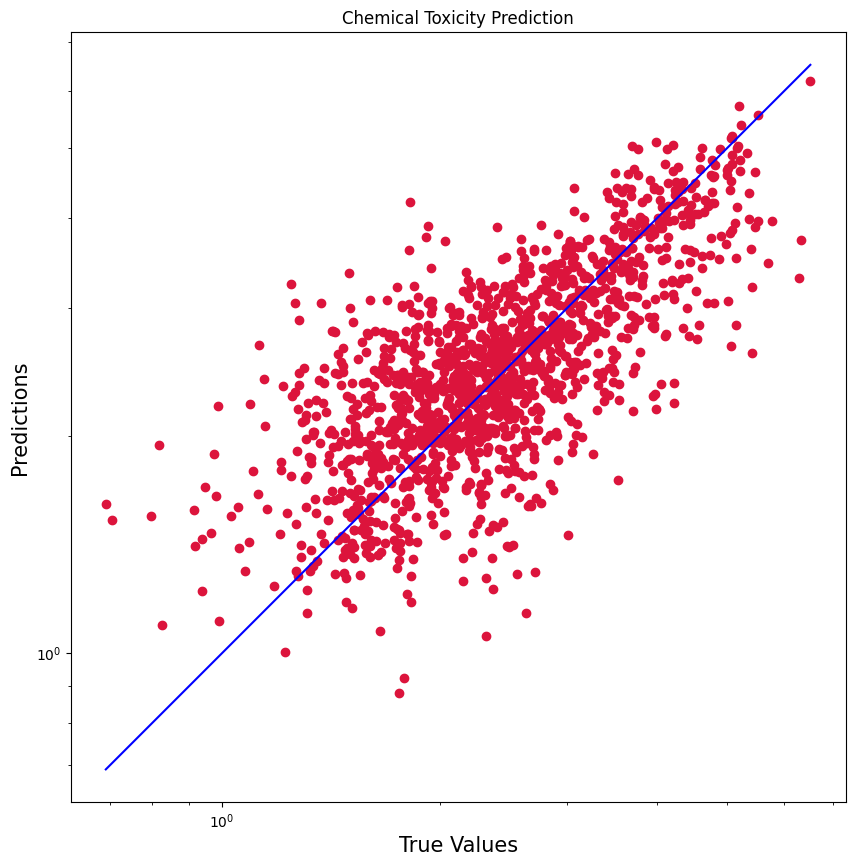

In [32]:
# 최종 테스트 결과 시각화
import matplotlib.pyplot as plt

# 참값 ~ 예측값 scatter plot
plt.figure(figsize=(10,10))
plt.scatter(y_label, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_label))
p2 = min(min(y_pred), min(y_label))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Chemical Toxicity Prediction')
plt.show()

**Graph Description**

* 위 그래프는 X축에 실제 독성 값(독성 정도를 나타내는 값), Y축에 예측한 독성 값을 나타낸다.
* 빨간 점 하나하나가 하나의 데이터 포인트를 나타내며, 각 점의 위치는 해당 데이터의 실제 독성 값과 예측된 독성 값을 의미한다.
* 파란 선은 `y = x`인 선으로, 예측값이 실제값과 정확히 일치하는 경우를 나타낸다. 즉, 점이 이 선에 가까울수록 예측이 정확하다는 뜻이다.
* 대부분의 점들이 파란 선 주변에 몰려 있으므로 모델의 예측이 실제 값과 잘 맞는 편임을 알 수 있다. 그러나 선에서 멀리 떨어진 점들도 있음을 보아, 일부 예측은 실제 값과 차이가 큰 경우도 있음을 알 수 있다.

즉, 이 테스트 결과와 그래프를 통해, 만든 모델이 독성 예측을 꽤 잘 하고 있지만, 모든 데이터 포인트에서 완벽하지는 않다는 것을 알 수 있어. 그래도 전반적으로 좋은 성능을 보이고 있다는 점에서 긍정적이다.